In [13]:
import torch 
import torchvision.datasets as dataset
import torchvision.transforms as Transform
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch_snippets import show

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

In [20]:
transforms= Transform.Compose([Transform.ToTensor(), Transform.Normalize(0.5,0.5)])

trainset= dataset.MNIST(root='./data', train=True, transform=transforms, download=True)

testset= dataset.MNIST(root= './data', train= False, transform=transforms, download=True)

dataloader= DataLoader(dataset=trainset, batch_size=8, shuffle=True )
testloader= DataLoader(dataset=testset, batch_size=8, shuffle=True )

torch.Size([28, 28])
tensor(4)


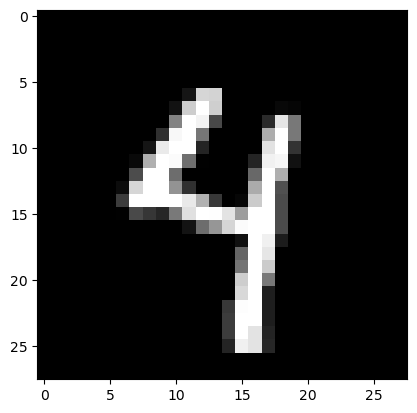

In [15]:
image,labels= next(iter(dataloader))
images=image[0]
print(images.squeeze().shape)

unnormaliZe=images*0.5+0.5

plt.imshow(unnormaliZe.squeeze().numpy(), cmap="gray")
print(labels[0])

In [16]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1= nn.Conv2d(1,16,3,padding=1)
        self.conv2= nn.Conv2d(16,32,3,padding=1)
        self.fc1= nn.Linear(32*28*28,64)
        self.fc2= nn.Linear(64,32)
        self.fc3= nn.Linear(32,10)

    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.relu(self.conv2(x))
        x=torch.flatten(x,start_dim=1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

    
NNetwork=Network()

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier = Network().to(device)
loss_fn= nn.CrossEntropyLoss()
optimizers= Adam(NNetwork.parameters(), lr=0.001)
epochs=50


In [6]:
for epoch in range(epochs):
    track_loss=0.0
    for i , data in enumerate(dataloader,0):
        images, labels= data
        

        optimizers.zero_grad() #setting the gradiemts to zero
        outputs= NNetwork(images) #forward pass 

        loss= loss_fn(outputs,labels)  # setting the loss
        loss.backward() # computing the loss function
        optimizers.step() #updating the weights

        track_loss += loss.item()

    avg_loss= track_loss/len(dataloader)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")



Epoch [1/50], Loss: 0.1345
Epoch [2/50], Loss: 0.0499
Epoch [3/50], Loss: 0.0302
Epoch [4/50], Loss: 0.0221
Epoch [5/50], Loss: 0.0142
Epoch [6/50], Loss: 0.0129
Epoch [7/50], Loss: 0.0101
Epoch [8/50], Loss: 0.0093
Epoch [9/50], Loss: 0.0096
Epoch [10/50], Loss: 0.0086
Epoch [11/50], Loss: 0.0080
Epoch [12/50], Loss: 0.0068
Epoch [13/50], Loss: 0.0068
Epoch [14/50], Loss: 0.0073
Epoch [15/50], Loss: 0.0062
Epoch [16/50], Loss: 0.0078
Epoch [17/50], Loss: 0.0066
Epoch [18/50], Loss: 0.0062
Epoch [19/50], Loss: 0.0051
Epoch [20/50], Loss: 0.0089
Epoch [21/50], Loss: 0.0079
Epoch [22/50], Loss: 0.0064
Epoch [23/50], Loss: 0.0054
Epoch [24/50], Loss: 0.0075
Epoch [25/50], Loss: 0.0100
Epoch [26/50], Loss: 0.0058
Epoch [27/50], Loss: 0.0059
Epoch [28/50], Loss: 0.0086
Epoch [29/50], Loss: 0.0048
Epoch [30/50], Loss: 0.0070
Epoch [31/50], Loss: 0.0079
Epoch [32/50], Loss: 0.0071
Epoch [33/50], Loss: 0.0054
Epoch [34/50], Loss: 0.0076
Epoch [35/50], Loss: 0.0100
Epoch [36/50], Loss: 0.0073
E

In [ ]:
PATH = '/MNIST_model_01.pth'
torch.save(NNetwork.state_dict(), PATH)

### Test Inference for MNIST

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])
tensor(3)


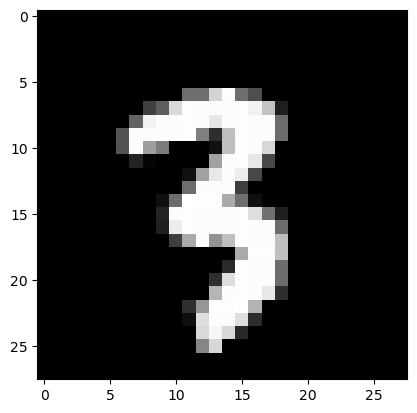

In [65]:
image,labels= next(iter(testloader))
images1=image[0].unsqueeze(0)

print(images1.shape)
print(images1.squeeze().shape)

unnormaliZe=images1*0.5+0.5

plt.imshow(unnormaliZe.squeeze().numpy(), cmap="gray")
print(labels[0])

In [66]:
path="MNIST_model_01.pth"
model=Network()
model.load_state_dict(torch.load(path, weights_only=True))
model.eval()

Network(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=25088, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [69]:
with torch.no_grad():
    output = model(images1)
    print(output.shape)
    predicted_digit = torch.argmax(output, dim=1).item()

print(f"Predicted Digit: {predicted_digit}")

torch.Size([1, 10])
Predicted Digit: 3
